## IMPORT LIBRARY

In [1]:
## BASIC LIBRARY
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## VISUALIZATION LIBRARY
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORT DATASET

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

In [4]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
100073,100073,6837315,8459370,10000,10000,10000.000000,36 months,10.640000,325.690000,B,B2,Harris County PID,4 years,MORTGAGE,50000.000000,Not Verified,Aug-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,moving,Moving & Relocation,773xx,TX,19.080000,0.000000,Jun-00,0.000000,59.000000,NaN,5.000000,0.000000,7819,57.900000,20.000000,f,2506.210000,2506.210000,9116.820000,9116.820000,7493.790000,1623.030000,0.000000,0.000000,0.000000,Dec-15,325.690000,Jan-16,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,0.000000,125050.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500.000000,NaN,NaN,NaN
52109,52109,9524700,11376842,21200,21200,21200.000000,60 months,23.400000,602.530000,E,E5,INVENTORY MANAGER,8 years,RENT,48000.000000,Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,CREDIT CARD ELIMINATION,641xx,MO,8.930000,0.000000,Apr-94,1.000000,NaN,NaN,4.000000,0.000000,13788,90.100000,13.000000,f,15180.660000,15180.660000,15063.170000,15063.170000,6019.340000,9043.830000,0.000000,0.000000,0.000000,Jan-16,602.530000,Feb-16,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,0.000000,13788.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15300.000000,NaN,NaN,NaN
300544,300544,28752994,31226130,7500,7500,7500.000000,36 months,14.490000,258.130000,C,C4,Personal Banker,1 year,RENT,54000.000000,Source Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,207xx,MD,10.440000,0.000000,May-07,2.000000,NaN,NaN,8.000000,0.000000,5598,48.300000,15.000000,f,4762.500000,4762.500000,3871.950000,3871.950000,2737.500000,1134.450000,0.000000,0.000000,0.000000,Jan-16,258.130000,Feb-16,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,658.000000,19456.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11600.000000,NaN,NaN,NaN
55243,55243,9226025,11048091,10000,10000,10000.000000,36 months,9.670000,321.130000,B,B1,Shipping / Receiving Clerk,< 1 year,RENT,55110.000000,Source Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Clean Credit Cards,070xx,NJ,14.570000,0.000000,Jan-99,1.000000,NaN,NaN,11.000000,0.000000,7384,75.300000,20.000000,w,3367.240000,3367.240000,8040.760000,8040.760000,6632.760000,1408.000000,0.000000,0.000000,0.000000,Jan-16,321.130000,Feb-16,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,0.000000,40291.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9800.000000,NaN,NaN,NaN
115714,115714,6209475,7691609,33425,33425,33375.000000,60 months,16.780000,826.750000,C,C5,Hill Air Force Base,10+ years,MORTGAGE,75000.000000,Verified,Jul-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Debt Consolidation,840xx,UT,26.320000,0.000000,Nov-94,0.000000,NaN,NaN,9.000000,0.000000,38244,85.000000,20.000000,f,20147.830000,20117.680000,24794.310000,24757.260000,13277.170000,11517.140000,0.000000,0.000000,0.000000,Jan-16,826.750000,Feb-16,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,0.000000

In [5]:
print('this dataset has %d rows and %d columns.\n' % df.shape)

this dataset has 466285 rows and 75 columns.



## FEATURE DESCRIPTION

| Features | Description |
| :--- | :--- |
| id | A unique LC assigned ID for the loan listing. |
| member_id | A unique LC assigned Id for the borrower member. |
| loan_amnt | Last month payment was received. |
| funded_amnt | The total amount committed to that loan at that point in time. |
| funded_amnt_inv | ?
| term | The number of payments on the loan. Values are in months and can be either 36 or 60. |
| int_rate | Indicates if income was verified by LC, not verified, or if the income source was verified. |
| installment | The monthly payment owed by the borrower if the loan originates. |
| grade | LC assigned loan grade. |
| sub_grade | LC assigned loan subgrade. |
| emp_title | The job title supplied by the Borrower when applying for the loan. |
| emp_length | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| home_ownership | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. |
| annual_inc | The self-reported annual income provided by the borrower during registration. |
| verification_status | verified / not. |
| issue_d | The month which the loan was funded. |
| loan_status | Current status of the loan. |
| pymn_plan | payment plan. |
| url | URL for the LC page with listing data. |
| desc | URL for the LC page with listing data. |
| purpose | A category provided by the borrower for the loan request. |
| title | A category provided by the borrower for the loan request. |
| zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application. |
| addr_state | The state provided by the borrower in the loan application. |
| dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. |
| delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.|
| earliest_cr_line | The month the borrower's earliest reported credit line was opened. |
| inq_last_6mths | The number of inquiries in past 6 months (excluding auto and mortgage inquiries) . |
| mths_since_last_delinq | The number of months since the borrower's last delinquency. |
| mths_since_last_record | The number of months since the last public record. |
| open_acc | The number of open credit lines in the borrower's credit file. |
| pub_rec | Number of derogatory public records. |
| revol_bal | Total credit revolving balance. |
| revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. |
| total_acc | The total number of credit lines currently in the borrower's credit file. |
| initial_list_status | The initial listing status of the loan. Possible values are – Whole, Fractional. |
| out_prncp | Remaining outstanding principal for total amount funded. |
| total_pymnt | Payments received to date for total amount funded. |
| total_pymnt_inv | Payments received to date for portion of total amount funded by investors. |
| total_rec_prncp | Principal received to date. |
| total_rec_int | Interest received to date. |
| total_rec_late_fee | Late fees received to date . |
| recoveries | Indicates if a payment plan has been put in place for the loan. | 
| collection_recovery_fee | post charge off collection fee. |
| last_pymnt_d | Last month payment was received. |
| last_pymnt_amnt | Last total payment amount received. |
| next_pymnt_d | Next scheduled payment date. |
| last_credit_pull_d | Last lc check history. |
| collection_12_mths_ex_med | Number of collections in 12 months excluding medical collections. |
| mths_since_last_major_derog | Months since most recent 90-day or worse rating. |
| policy_code | "publicly available policy_code=1, new products not publicly available policy_code=2". |
| application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers. |
| annual_inc_joint | The combined self-reported annual income provided by the co-borrowers during registration. |
| dti_join | A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income. |
| verification_status_join | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified. |
| acc_now_deilnq | The number of accounts on which the borrower is now delinquent. |
| tot_coll_amt | Total collection amounts ever owed. |
| tot_cur_bal | Total current balance of all accounts. |
| open_acc_6m | Number of open trades in last 6 months. |
| open_il_6m | Number of installment accounts opened in past 6 months. |
| open_il_12m | Number of installment accounts opened in past 12 months. |
| open_il_24m | Number of installment accounts opened in past 24 months. |
| mths_since_rcnt_il | Months since most recent installment accounts opened. |
| total_bal_il | Total current balance of all installment accounts. |
| il_util | Ratio of total current balance to high credit/credit limit on all install acct. |
| open_rv_12m | Number of revolving trades opened in past 12 months. |
| open_rv_24m | Number of revolving trades opened in past 24 months. |
| max_bal_bc | Maximum current balance owed on all revolving accounts. |
| all_util | Balance to credit limit on all trades. |
| total_rev_hi_lim | Total revolving high credit/credit limit. |
| inq_fi | Number of personal finance inquiries. |
| total_cu_tl | Number of finance trades. |
| inq_last_12m | Number of credit inquiries in past 12 months. |

## 1. EXPLORATORY DATA ANALYSIS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
df.sample(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
338841,338841,20839548,23122393,11850,11850,11850.000000,36 months,20.200000,441.600000,E,E3,NaN,NaN,RENT,33000.000000,Verified,Aug-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,191xx,PA,27.710000,0.000000,May-07,1.000000,NaN,119.000000,10.000000,1.000000,20703,73.400000,16.000000,f,0.000000,0.000000,13426.690000,13426.690000,11850.000000,1576.690000,0.000000,0.000000,0.000000,Apr-15,10335.490000,NaN,Jul-15,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,0.000000,24131.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28200.000000,NaN,NaN,NaN


### 1.1 Descriptive Statistics Analysis

#### 1.1.1 Numerical Features

In [8]:
## Descriptive Statistics Numerical
num_features = df.select_dtypes(include=['int64', 'float64'])
print('Total numerical features = {}'.format(num_features.shape[1]))

Total numerical features = 53


In [9]:
num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   annual_inc                   466281 non-null  float64
 9   dti                          466285 non-null  float64
 10  delinq_2yrs                  466256 non-null  float64
 11  inq_last_6mths               466256 non-null  float64
 12  mths_since_last_delinq       215934 non-null  float64
 13 

In [10]:
num_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.000000,233142.000000,134605.029472,0.000000,116571.000000,233142.000000,349713.000000,466284.000000
id,466285.000000,13079729.906182,10893711.624551,54734.000000,3639987.000000,10107897.000000,20731209.000000,38098114.000000
member_id,466285.000000,14597660.622827,11682367.441450,70473.000000,4379705.000000,11941075.000000,23001541.000000,40860827.000000
loan_amnt,466285.000000,14317.277577,8286.509164,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt,466285.000000,14291.801044,8274.371300,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt_inv,466285.000000,14222.329888,8297.637788,0.000000,8000.000000,12000.000000,19950.000000,35000.000000
int_rate,466285.000000,13.829236,4.357587,5.420000,10.990000,13.660000,16.490000,26.060000
installment,466285.000000,432.061201,243.485550,15.670000,256.690000,379.890000,566.580000,1409.990000
annual_inc,466281.000000,73277.381470,54963.568654,1896.000000,45000.000000,63000.000000,88960.000000,7500000.000000
dti,466285.000000,17.218758,7.851121,0.000000,11.360000,16.870000,22.780000,39.990000


**Result**

- **Unamed: 0**, **id**, **member_id** are unique for each row which means each row represent one individuals.
- **policy_code** has only one unique value.
- There are 17 features that have missing values.

In [11]:
## Drop unnecessary features
df.drop(['Unnamed: 0', 'member_id', 'policy_code', 'annual_inc_joint', 'dti_joint', 
         'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
         'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
         'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'
        ], inplace=True, axis=1)

#### 1.1.2. Categorical Features

In [12]:
## Descriptive Statistics Categorical

cat_features = df.select_dtypes(include=['object'])
print('Total categorical features = {}'.format(cat_features.shape[1]))

Total categorical features = 22


In [13]:
cat_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 466285 non-null  object
 1   grade                466285 non-null  object
 2   sub_grade            466285 non-null  object
 3   emp_title            438697 non-null  object
 4   emp_length           445277 non-null  object
 5   home_ownership       466285 non-null  object
 6   verification_status  466285 non-null  object
 7   issue_d              466285 non-null  object
 8   loan_status          466285 non-null  object
 9   pymnt_plan           466285 non-null  object
 10  url                  466285 non-null  object
 11  desc                 125983 non-null  object
 12  purpose              466285 non-null  object
 13  title                466265 non-null  object
 14  zip_code             466285 non-null  object
 15  addr_state           466285 non-nu

In [14]:
cat_features.describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


**Result**

- **emp_title**, **url**, **desc**, **title**, **zip_code**, **addr_state** have many unique values.
- **application_type** has only one unique values.

In [15]:
## Drop unnecessary features
df.drop(['emp_title', 'url', 'desc', 'title', 'zip_code', 
         'addr_state', 'application_type', 'sub_grade'
        ], inplace=True, axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

## 2. DATA PREPROCESSING

### 2.1 Define target features

In this dataset, the target feature is loan_status which is a feature that can be used as a target feature because it reflects the performance of each individual in making loan/credit payments so far.

**loan_status** description:
- Fully paid: loan has been fully repaid.
- Current: applicants is make payments on time
- In grace period: applicants in grace period
- Late: applicants late make payments
- Default: applicant fails to pay back a debt according to the initial arrangement.
- Charge Off: applicants been delinquent on their credit card or loan payments for several months. 

base on the explanation above, i will create a new feature namely **Bad Loan** and **Good Loan**
1. Bad Loan class consists Default, Late, ChargeOff
    - Because if the applicant is in that period, it can affect his credit score and potentially impact his ability to obtain credit in the future.
    
2. Good Loan class consist Fully Paid, Current, In grace period
    - Because that if the applicant applies for a loan again and is likely to return the loan, refusing the loan can result in a loss of business for the company.

In [17]:
pct_loan = df.groupby('loan_status').size().reset_index()
pct_loan.columns = ['target', 'total']
pct_loan['%'] = round(pct_loan['total']*100/sum(pct_loan['total']),2)
pct_loan.sort_values(by='total', ascending=False)

,target,total,%
1,Current,224226,48.090000
5,Fully Paid,184739,39.620000
0,Charged Off,42475,9.110000
8,Late (31-120 days),6900,1.480000
6,In Grace Period,3146,0.670000
4,Does not meet the credit policy. Status:Fully ...,1988,0.430000
7,Late (16-30 days),1218,0.260000
2,Default,832,0.180000
3,Does not meet the credit policy. Status:Charge...,761,0.160000


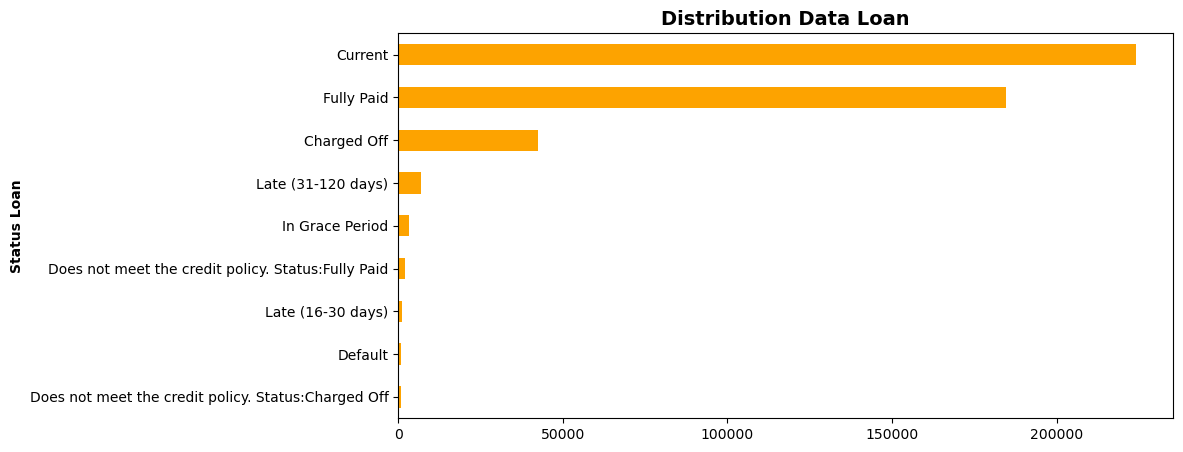

In [18]:
## Visualization
plt.figure(figsize=(10, 5))
viz_loan = df['loan_status'].value_counts().sort_values(ascending=True)
viz_loan.plot(kind='barh', color='#fda300')
plt.title('Distribution Data Loan', fontsize=14, fontweight='bold')
plt.ylabel('Status Loan', fontweight='bold')
plt.show()

In [19]:
## Create target features
bad_status = ['Default', 
              'Late (16-30 days)', 
              'Late (31-120 days)', 
              'Charged Off', 
              'Does not meet the credit policy. Status:Charged Off'
             ]

df['flag'] = np.where(df['loan_status'].isin(bad_status), 'Bad Loan', 'Good Loan')

In [20]:
df['flag'].value_counts(normalize=True)*100

Good Loan   88.808132
Bad Loan    11.191868
Name: flag, dtype: float64

### 2.2 Feature Engineering

**2.2.1 emp_length**

In [21]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [22]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')

In [23]:
df['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [24]:
df.drop(['emp_length'], inplace=True, axis=1)

**2.3.2 term**

In [25]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [26]:
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].str.replace(' ', '')

In [27]:
df['term_int'].unique()

array(['36', '60'], dtype=object)

In [28]:
df['term_int'] = df['term_int'].astype(int)

In [29]:
df.drop(['term'], inplace=True, axis=1)

**2.3.3 issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d**

In [30]:
## Convert string to datetime
from datetime import datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')

In [31]:
df[['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']].sample(3)

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d,next_pymnt_d
313,1997-12-01,2011-12-01,2013-10-01,2016-01-01,NaT
266816,2009-01-01,2014-11-01,2016-01-01,2016-01-01,2016-02-01
420875,1992-10-01,2014-03-01,2016-01-01,2016-01-01,2016-02-01


In [32]:
## assumed date (March 1st, 2016)
df['earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))
df['last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))
df['last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))
df['next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df['next_pymnt_d']) / np.timedelta64(1, 'M')))
df['issue_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df['issue_d']) / np.timedelta64(1, 'M')))

In [33]:
df.loc[df['earliest_cr_line']<0, 'earliest_cr_line'] = df['earliest_cr_line'].max()

### 2.2 Data Cleansing

In [34]:
## Drop unnecessary features
df.drop(['id'], inplace=True, axis=1)
df.sample(1)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,flag,emp_length_int,term_int
265397,12000,12000,12000.000000,9.170000,382.550000,B,MORTGAGE,57000.000000,Not Verified,17.000000,Current,n,debt_consolidation,5.200000,0.000000,247.000000,0.000000,39.000000,NaN,7.000000,0.000000,13704,58.300000,16.000000,w,7719.530000,7719.530000,5349.590000,5349.590000,4280.470000,1069.120000,0.000000,0.000000,0.000000,2.000000,382.550000,2.000000,2.000000,0.000000,NaN,0.000000,0.000000,13704.000000,23500.000000,Good Loan,7,36


In [35]:
## Check duplicate data
print('Duplicatation status: ', df.duplicated().values.any())
print('Total duplication: ', df.duplicated().sum())

Duplicatation status:  False
Total duplication:  0


In [36]:
## Check missing values
missing_values = df.isnull().sum() * 100 / len(df)

## Check tipe data
dtypes = [df[col].dtype for col in df.columns]

## data frame for missing values
mv_df = pd.DataFrame({'data type': dtypes,
                      '%': missing_values
                     })

mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

,data type,%
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
mths_since_last_delinq,float64,53.690554
next_pymnt_d,float64,48.728567
total_rev_hi_lim,float64,15.071469
tot_cur_bal,float64,15.071469
tot_coll_amt,float64,15.071469
emp_length_int,object,4.505399
last_pymnt_d,float64,0.080637
revol_util,float64,0.072917


In [37]:
## Drop featurues that have missing values (>50%)
columns_drop = mv_df[mv_df['%'] > 50].index

df.drop(columns_drop, inplace=True, axis=1)

In [38]:
## Check missing values
missing_values = df.isnull().sum() * 100 / len(df)

## Check tipe data
dtypes = [df[col].dtype for col in df.columns]

## data frame for missing values
mv_df = pd.DataFrame({'data type': dtypes,
                      '%': missing_values
                     })

mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

,data type,%
next_pymnt_d,float64,48.728567
total_rev_hi_lim,float64,15.071469
tot_cur_bal,float64,15.071469
tot_coll_amt,float64,15.071469
emp_length_int,object,4.505399
last_pymnt_d,float64,0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,float64,0.009007
acc_now_delinq,float64,0.006219


In [39]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['emp_length_int'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['tot_coll_amt'].fillna(0, inplace=True)

## 3. BUSINESS INSIGHT

**3.1 Univariate Analysis: Target**

In [40]:
viz_status = df.groupby('flag').size().reset_index()
viz_status.columns = ['target', 'total']
viz_status['%'] = round(viz_status['total']*100/sum(viz_status['total']),2)
viz_status.sort_values(by='total', ascending=False)

,target,total,%
1,Good Loan,414099,88.810000
0,Bad Loan,52186,11.190000


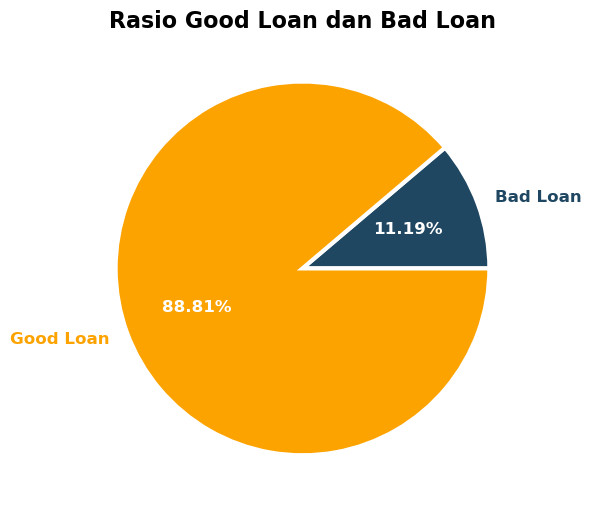

In [41]:
## Visualization
fig, ax = plt.subplots(figsize=(6,6))
##---------------------------------------
patches, texts, pcts = ax.pie(viz_status['total'], labels=viz_status['target'], autopct='%.2f%%',
                              wedgeprops = {'linewidth': 3.0, 'edgecolor': 'white'},
                              textprops = {'size': 'large'},
                              colors=['#1f4762', '#fda300']
                             )
##---------------------------------------
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Good Loan dan Bad Loan', fontsize=16, pad=5, loc='center', fontweight='bold')
plt.tight_layout()

**Result**

It can be seen that the dataset is highly unbalanced, with the “Bad Loan” minority class scoring only 11% of the total data, while the “Good Risk” majority class scoring 88% of the total data.

**3.2 Bivariate Analysis: Categorical Features**

In [42]:
good = df[df['flag'] == 'Good Loan']
bad = df[df['flag'] == 'Bad Loan']

**3.2.1 Term**

In [43]:
## Good Loan
good_term = good.groupby(df['term_int']).size().reset_index()
good_term.columns = ['term', 'total']
good_term['%'] = round(good_term['total']*100 / sum(good_term['total']),2)
good_term.sort_values(by='total', ascending=False)

,term,total,%
0,36,304374,73.500000
1,60,109725,26.500000


In [44]:
## Bad Loan
bad_term = bad.groupby(df['term_int']).size().reset_index()
bad_term.columns = ['term', 'total']
bad_term['%'] = round(bad_term['total']*100 / sum(bad_term['total']),2)
bad_term.sort_values(by='total', ascending=False)

,term,total,%
0,36,33579,64.340000
1,60,18607,35.660000


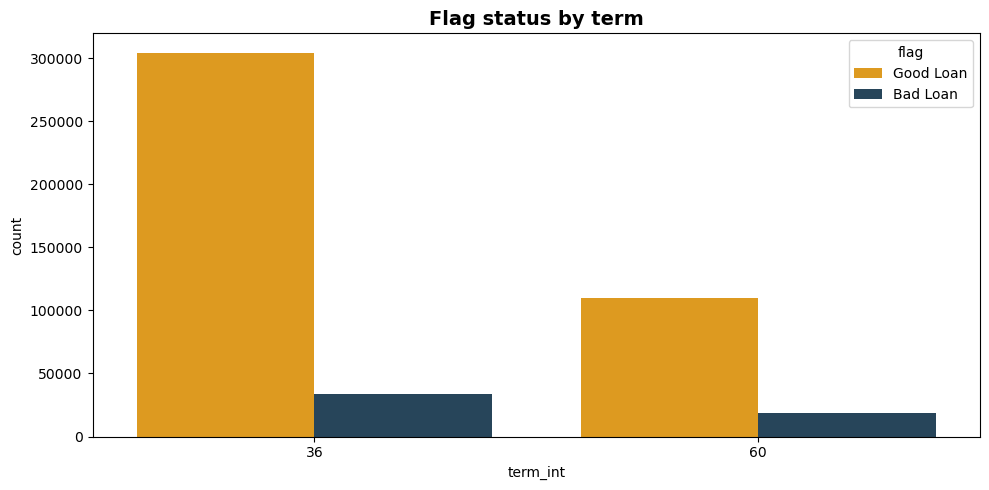

In [45]:
## Visualization
plt.figure(figsize=(10,5))
sns.countplot(data = df, x='term_int', hue='flag', palette=['#fda300', '#1f4762'])
plt.title('Flag status by term', fontsize=14, fontweight='bold')
plt.tight_layout()

**Result**

- There are only 2 types loan term, either 36 or 60 months.
- Loan with 60 months have the risk of becoming bad loans.

**3.2.2 Verification Status**

In [46]:
## in general
df['verification_status'].value_counts(normalize=True)

Verified          0.360413
Source Verified   0.321677
Not Verified      0.317911
Name: verification_status, dtype: float64

In [47]:
good_vs = good.groupby(df['verification_status']).size().reset_index()
good_vs.columns = ['verification_status', 'total']
good_vs['%'] = round(good_vs['total']*100 / sum(good_vs['total']),2)
good_vs.sort_values(by='total', ascending=False)

,verification_status,total,%
2,Verified,146164,35.300000
0,Not Verified,134032,32.370000
1,Source Verified,133903,32.340000


In [48]:
bad_vs = bad.groupby(df['verification_status']).size().reset_index()
bad_vs.columns = ['verification_status', 'total']
bad_vs['%'] = round(bad_vs['total']*100 / sum(bad_vs['total']),2)
bad_vs.sort_values(by='total', ascending=False)

,verification_status,total,%
2,Verified,21891,41.950000
1,Source Verified,16090,30.830000
0,Not Verified,14205,27.220000


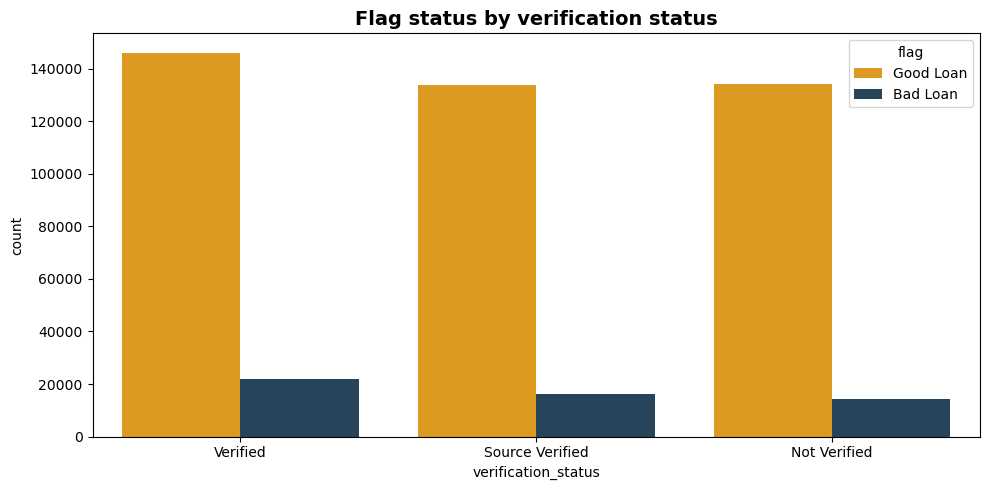

In [49]:
## Visualization
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='verification_status', hue='flag', palette=['#fda300', '#1f4762'])
plt.title('Flag status by verification status', fontsize=14, fontweight='bold')
plt.tight_layout()

**Result**

- Verification status tell us whether the income was verified by the company, not verified, or if the income source was verified.
- Most of the income has had its verified by the company (36%) although 31% were not verified.

**3.2.3 Home Ownership**

In [50]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [51]:
def func(row):
    if row['home_ownership'] == 'RENT':
        val = 'RENT'
    elif row['home_ownership'] == 'OWN':
        val = 'OWN'
    elif row['home_ownership'] == 'MORTGAGE':
        val = 'MORTGAGE'
    else:
        val = 'OTHERS'
    return val

df['home_ownership'] = df.apply(func, axis=1)

In [52]:
df['home_ownership'].value_counts(normalize=True)

MORTGAGE   0.505860
RENT       0.404201
OWN        0.089439
OTHERS     0.000500
Name: home_ownership, dtype: float64

In [53]:
## Good Loan
good_ho = good.groupby(df['home_ownership']).size().reset_index()
good_ho.columns = ['home_ownership', 'total']
good_ho['%'] = round(good_ho['total']*100 / sum(good_ho['total']),2)
good_ho.sort_values(by='total', ascending=False)

,home_ownership,total,%
0,MORTGAGE,212628,51.350000
3,RENT,164223,39.660000
2,OWN,37061,8.950000
1,OTHERS,187,0.050000


In [54]:
## Bad Loan
bad_ho = bad.groupby(df['home_ownership']).size().reset_index()
bad_ho.columns = ['home_ownership', 'total']
bad_ho['%'] = round(bad_ho['total']*100 / sum(bad_ho['total']),2)
bad_ho.sort_values(by='total', ascending=False)

,home_ownership,total,%
3,RENT,24250,46.470000
0,MORTGAGE,23247,44.550000
2,OWN,4643,8.900000
1,OTHERS,46,0.090000


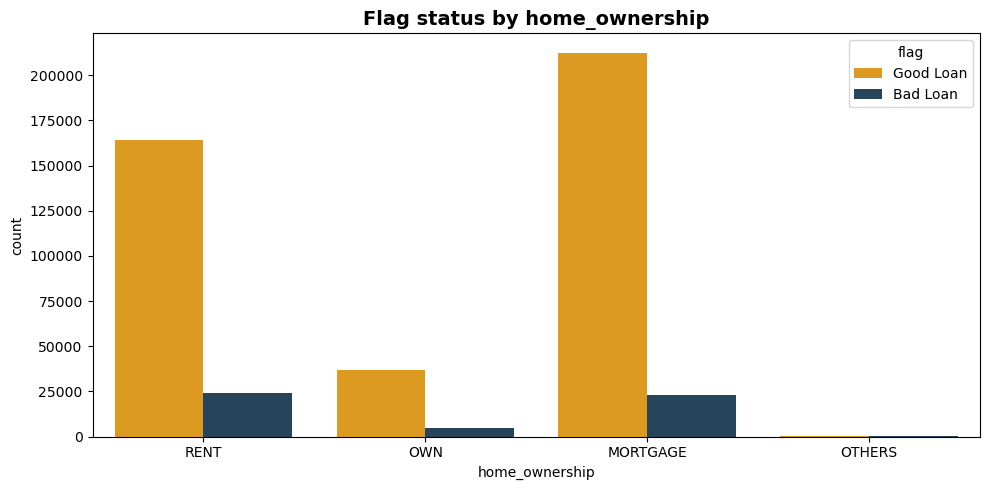

In [55]:
## Visualization
plt.figure(figsize=(10,5))
sns.countplot(data = df, x='home_ownership', hue='flag', palette=['#fda300', '#1f4762'])
plt.title('Flag status by home_ownership', fontsize=14, fontweight='bold')
plt.tight_layout()

**Result**

- The home ownership feature is category provided by the applicant's during registration.
- Most applicants have an existing mortgage (50%) or are currently renting a home (40%).
- Applicants who have an existing mortgage or are currently renting a home have a higher probability of bad risk.

**3.2.4 Purpose**

In [56]:
df['purpose'].value_counts(normalize=True)

debt_consolidation   0.588042
credit_card          0.223376
home_improvement     0.056912
other                0.050806
major_purchase       0.021077
small_business       0.015040
car                  0.011574
medical              0.009870
moving               0.006421
vacation             0.005334
wedding              0.005025
house                0.004866
educational          0.000905
renewable_energy     0.000753
Name: purpose, dtype: float64

In [57]:
## Good Loan
good_p = good.groupby(df['purpose']).size().reset_index()
good_p.columns = ['purpose', 'total']
good_p['%'] = round(good_p['total']*100 / sum(good_p['total']),2)
good_p.sort_values(by='total', ascending=False)

,purpose,total,%
2,debt_consolidation,242359,58.530000
1,credit_card,94957,22.930000
4,home_improvement,23865,5.760000
9,other,20351,4.910000
6,major_purchase,8866,2.140000
11,small_business,5467,1.320000
0,car,4909,1.190000
7,medical,3978,0.960000
8,moving,2529,0.610000
12,vacation,2182,0.530000


In [58]:
## Bad Loan
bad_p = bad.groupby(df['purpose']).size().reset_index()
bad_p.columns = ['purpose', 'total']
bad_p['%'] = round(bad_p['total']*100 / sum(bad_p['total']),2)
bad_p.sort_values(by='total', ascending=False)

,purpose,total,%
2,debt_consolidation,31836,61.000000
1,credit_card,9200,17.630000
9,other,3339,6.400000
4,home_improvement,2672,5.120000
11,small_business,1546,2.960000
6,major_purchase,962,1.840000
7,medical,624,1.200000
0,car,488,0.940000
8,moving,465,0.890000
5,house,322,0.620000


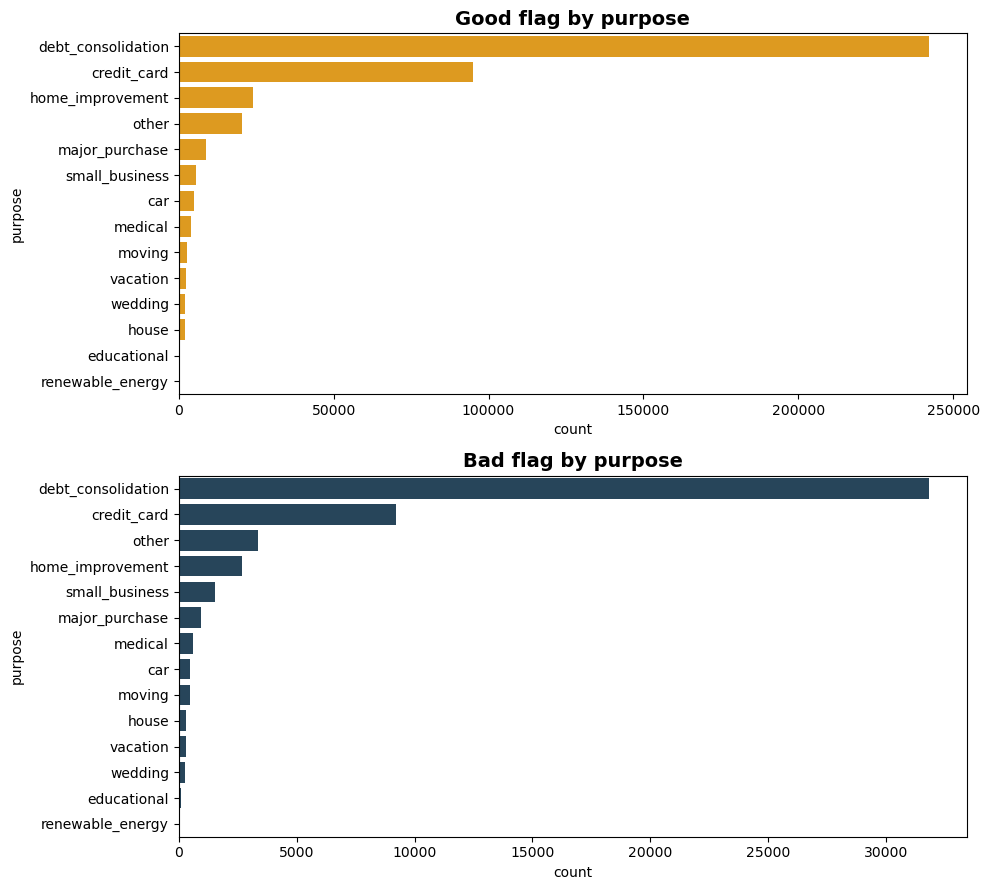

In [59]:
## Visualization
fig, ax = plt.subplots(2, figsize=(10,9))

sns.countplot(data=good, 
              y='purpose', 
              color='#fda300', 
              order=good['purpose'].value_counts().index,
              ax=ax[0])
ax[0].set_title('Good flag by purpose', fontsize=14, fontweight='bold')

sns.countplot(data=bad,
              y='purpose',
              color='#1f4762',
              order=bad['purpose'].value_counts().index,
              ax=ax[1]
             )
ax[1].set_title('Bad flag by purpose', fontsize=14, fontweight='bold')

plt.tight_layout()

**Result**

- The purpose feature is a category provided by the applicant's for the loan request. There are 13 categories.
- There are over half of the loans (58%) were for debt consolidation. Other significant categories were credit card and home improvement.
- Only 0.1% of loans for renewable energy have bad risk status, but 61% of debt consolidation loans have bad risk status.

## 4. FEATURE SELECTION

**4.1.1 Correlaction Check**

<Axes: >

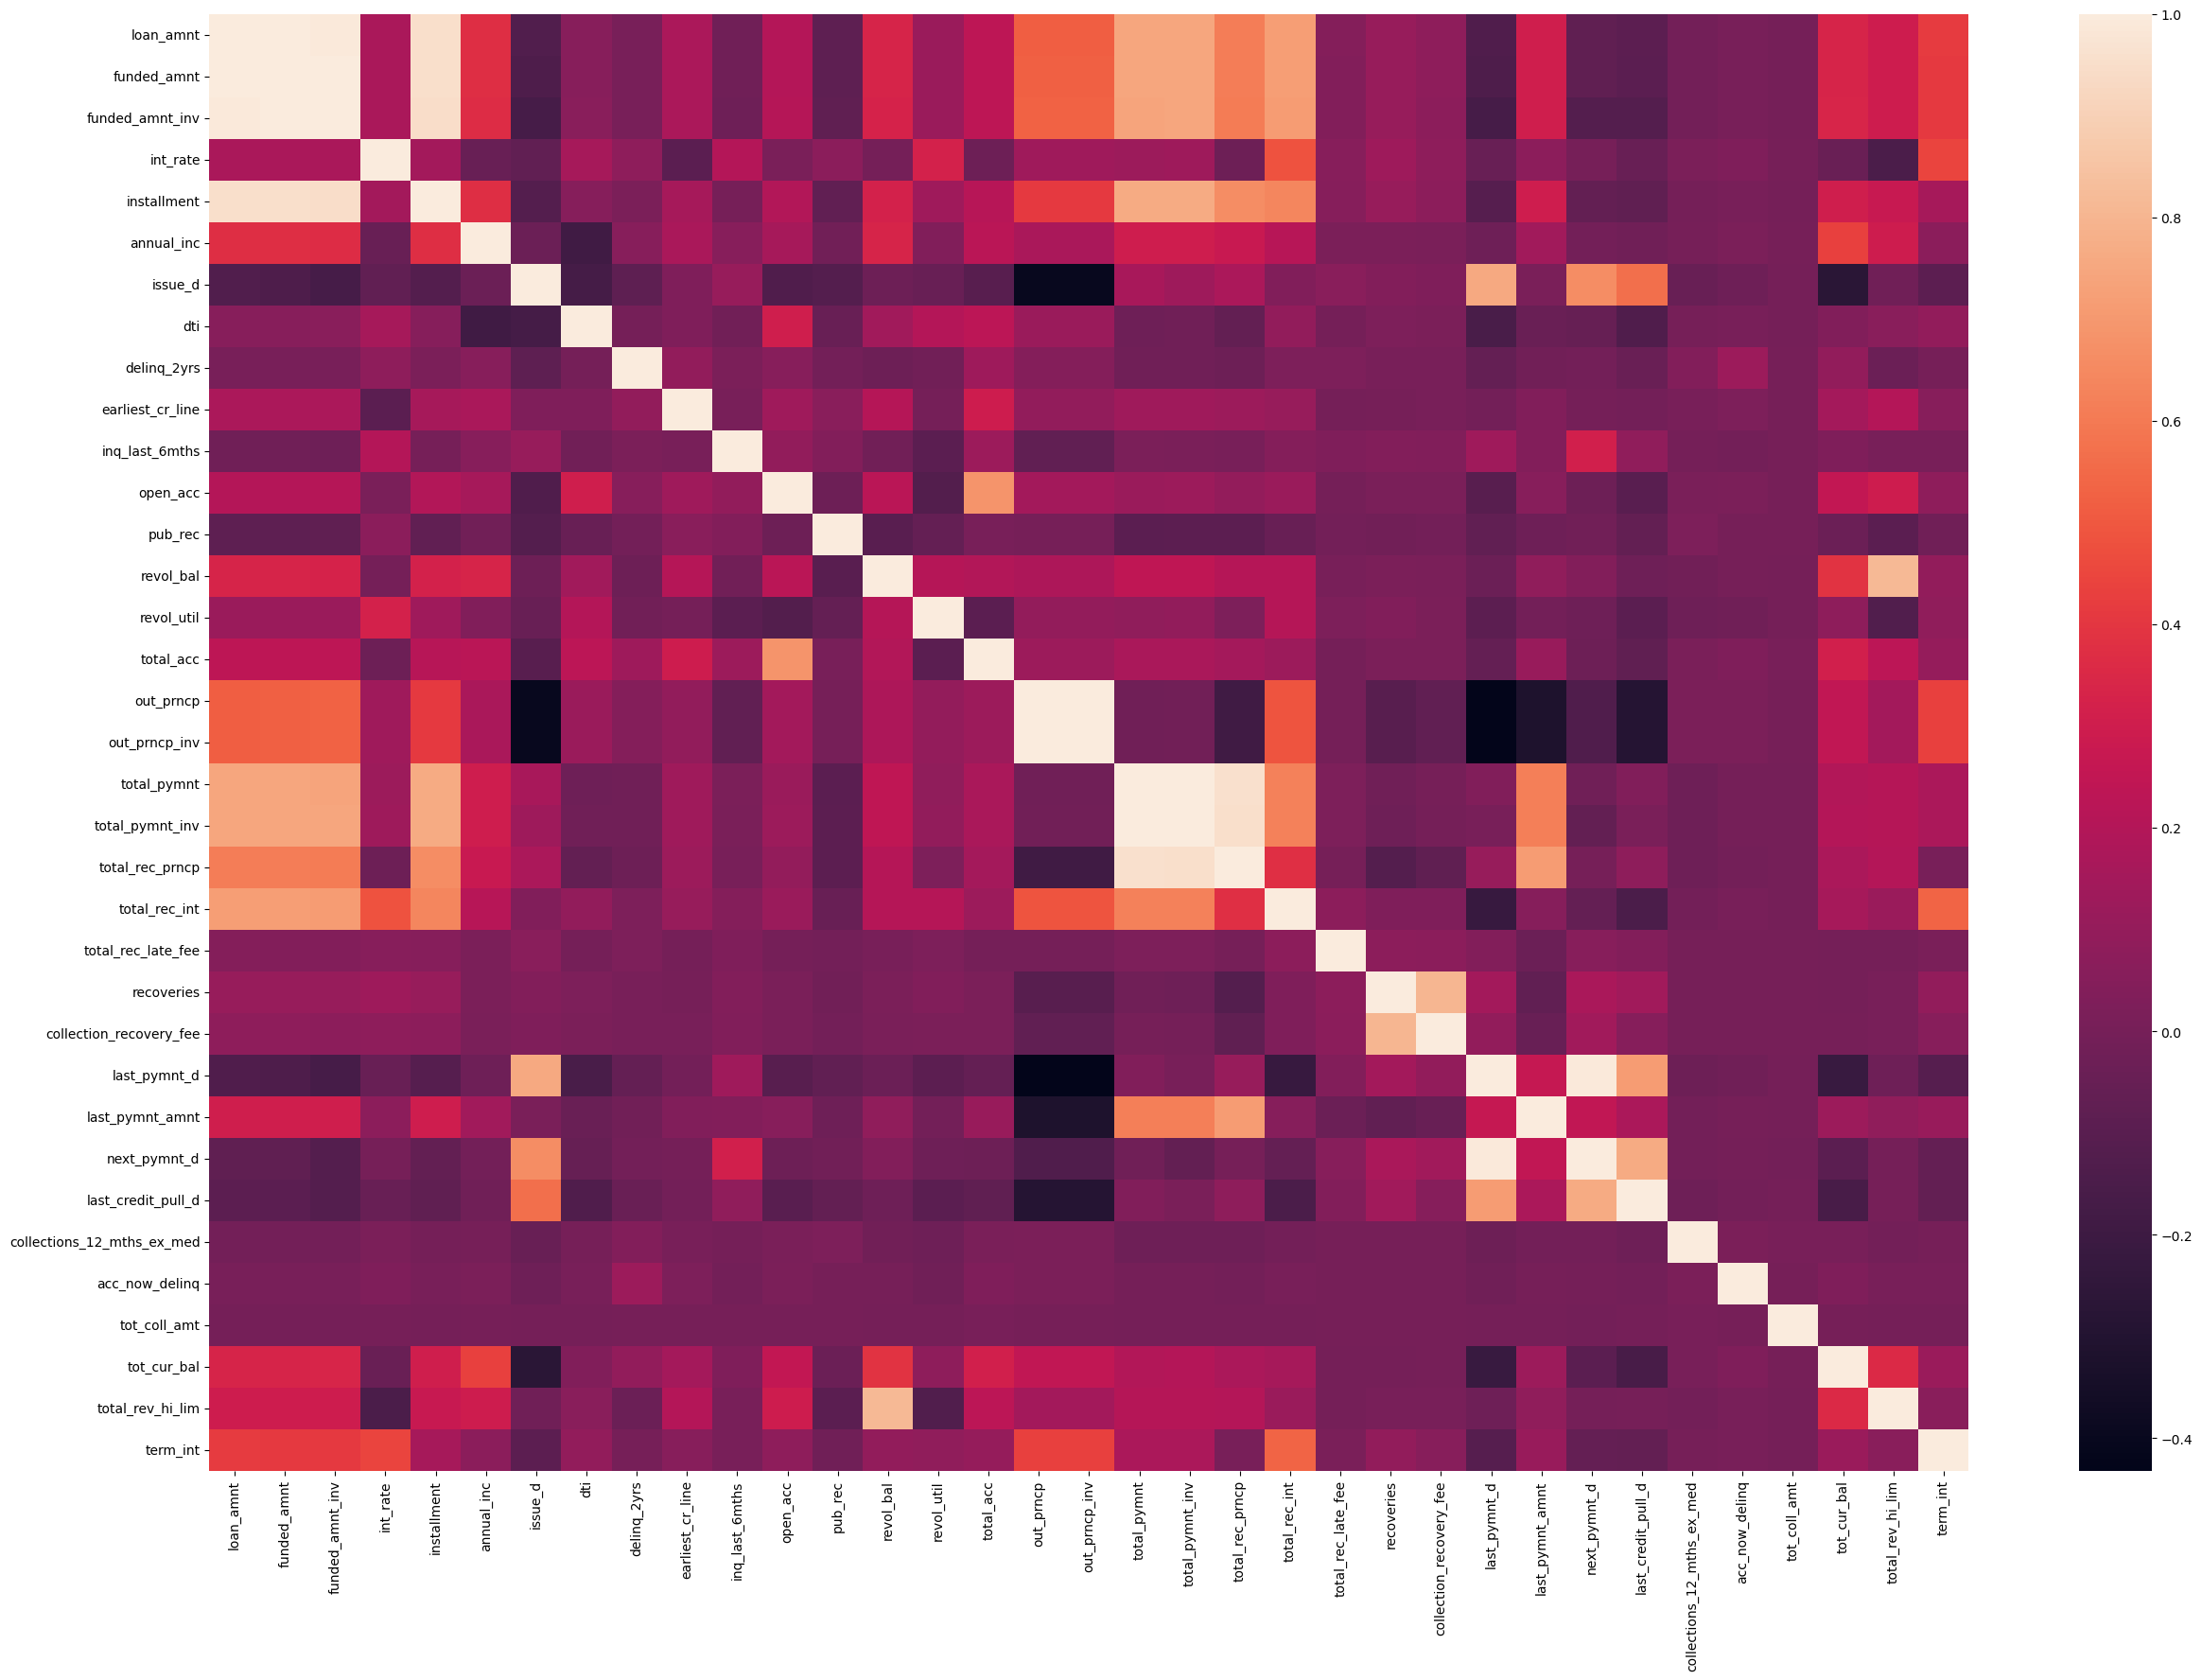

In [60]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr())

In [61]:
## Drop correlation feature > 0.7
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [62]:
## Cek feature > 0.7
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'total_rev_hi_lim']

In [63]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

**4.1.2 Check categorical feature**

In [64]:
df.select_dtypes(include='object').nunique()

grade                   7
home_ownership          4
verification_status     3
loan_status             9
pymnt_plan              2
purpose                14
initial_list_status     2
flag                    2
emp_length_int         12
dtype: int64

In [65]:
## Drop loan_status because it has been replaced to flag
df.drop(['loan_status'], inplace=True, axis=1)

In [66]:
df['pymnt_plan'].value_counts(normalize=True)

n   0.999981
y   0.000019
Name: pymnt_plan, dtype: float64

In [67]:
## Drop pymnt_plan because imbalance
df.drop(['pymnt_plan'], inplace=True, axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   int_rate                    466285 non-null  float64
 2   grade                       466285 non-null  object 
 3   home_ownership              466285 non-null  object 
 4   annual_inc                  466285 non-null  float64
 5   verification_status         466285 non-null  object 
 6   issue_d                     466285 non-null  float64
 7   purpose                     466285 non-null  object 
 8   dti                         466285 non-null  float64
 9   delinq_2yrs                 466285 non-null  float64
 10  earliest_cr_line            466285 non-null  float64
 11  inq_last_6mths              466285 non-null  float64
 12  open_acc                    466285 non-null  float64
 13  pub_rec       

## Feature Encoding

In [69]:
## Encode Flag jika Good -> 0, jika Bad -> 1
df['flag'] = np.where(df['flag'] == 'Bad Loan', 1, 0)

In [70]:
df['flag'].value_counts(normalize=True)*100

0   88.808132
1   11.191868
Name: flag, dtype: float64

In [71]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [72]:
categorical_cols

['grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'emp_length_int']

In [73]:
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)

onehot.sample(5)

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,emp_length_int_0,emp_length_int_1,emp_length_int_10,emp_length_int_2,emp_length_int_3,emp_length_int_4,emp_length_int_5,emp_length_int_6,emp_length_int_7,emp_length_int_8,emp_length_int_9
143117,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
363993,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
296461,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
150975,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
404001,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Standardization

In [74]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.to_list()]
numerical_cols = [col for col in df.columns.to_list() if col not in categorical_cols + ['flag']]

In [75]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [76]:
std.sample(3)

,loan_amnt,int_rate,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_int
431316,2.495954,0.858450,0.122311,-0.436201,0.677769,-0.357012,0.296367,-0.737182,0.363587,-0.314290,1.477097,1.596981,-0.091615,3.322538,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,0.290841,1.622784
297179,1.651206,-1.539669,0.149602,-0.924342,1.171967,-0.357012,-0.235578,-0.737182,2.368340,-0.314290,0.224644,-0.956404,0.597953,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,1.879328,-0.616225
240964,2.495954,0.610606,0.668130,-1.063810,1.631774,-0.357012,-0.119937,-0.737182,0.965013,-0.314290,0.718013,1.016475,1.028934,3.970211,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,0.198560,1.622784


In [77]:
df_model = pd.concat([onehot, std, df[['flag']]], axis=1)

## MODELLING

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df_model.drop('flag', axis=1)
y = df_model['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_train.shape, X_test.shape

((373028, 57), (93257, 57))

In [81]:
X_train.isnull().sum()

grade_B                                0
grade_C                                0
grade_D                                0
grade_E                                0
grade_F                                0
grade_G                                0
home_ownership_OTHERS                  0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_credit_card                    0
purpose_debt_consolidation             0
purpose_educational                    0
purpose_home_improvement               0
purpose_house                          0
purpose_major_purchase                 0
purpose_medical                        0
purpose_moving                         0
purpose_other                          0
purpose_renewable_energy               0
purpose_small_business                 0
purpose_vacation                       0
purpose_wedding                        0
initial_list_sta

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_clasification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Tes Set) : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Tes Set): %.2f' % precision_score(y_test, y_pred))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    print('AUC (train-proba) : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

**GradientBoosting**

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
eval_clasification(gbc)

Accuracy (Tes Set) : 0.94
Precision (Tes Set): 0.99
Recall (Test Set): 0.49
AUC (Test Proba): 0.87
AUC (train-proba) : 0.87
roc_auc (crossval train): 0.8847259344537795
roc_auc (crossval test): 0.7529602818433395


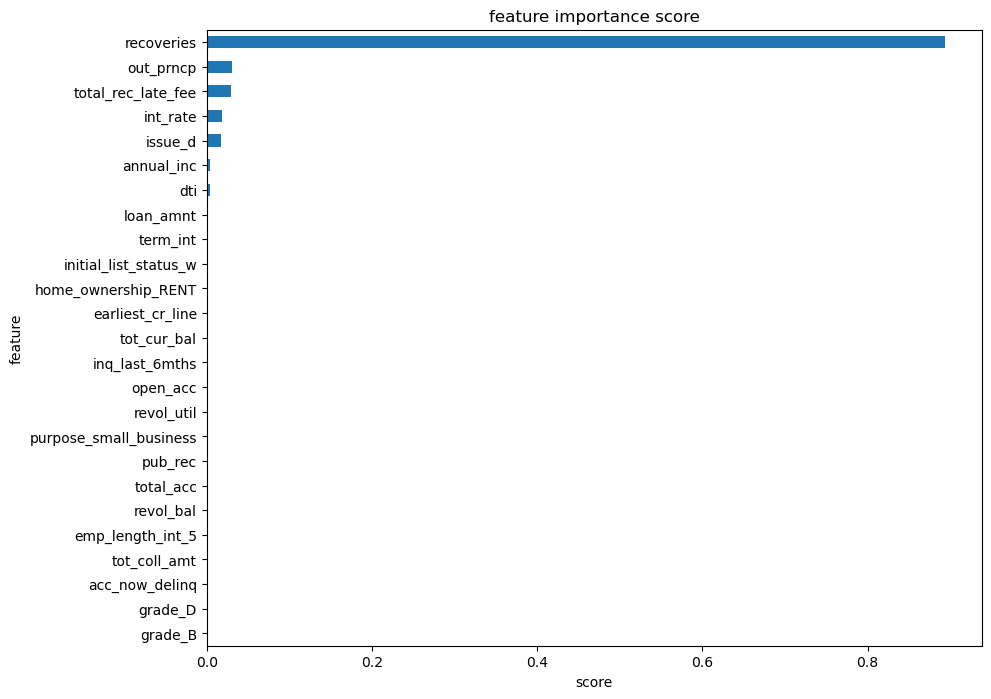

In [84]:
show_feature_importance(gbc)

**AdaBoosting**

In [85]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)
eval_clasification(abc)

Accuracy (Tes Set) : 0.94
Precision (Tes Set): 0.98
Recall (Test Set): 0.49
AUC (Test Proba): 0.87
AUC (train-proba) : 0.87
roc_auc (crossval train): 0.8786020390541986
roc_auc (crossval test): 0.7595063157254272


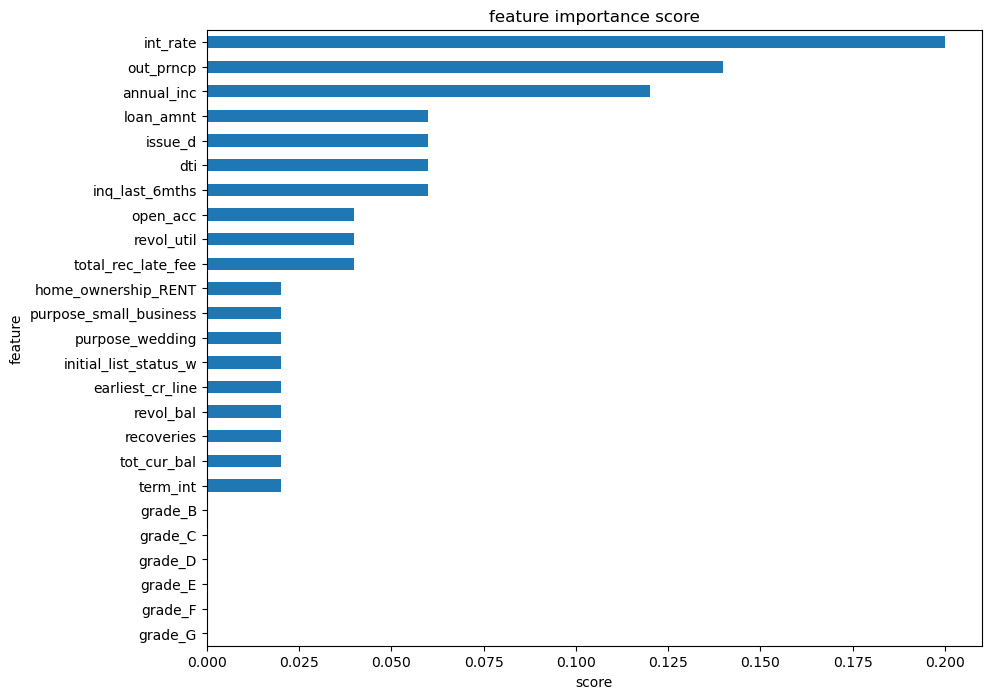

In [86]:
show_feature_importance(abc)

**XGBoosting**

In [87]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_clasification(xg)

Accuracy (Tes Set) : 0.94
Precision (Tes Set): 0.97
Recall (Test Set): 0.52
AUC (Test Proba): 0.91
AUC (train-proba) : 0.94
roc_auc (crossval train): 0.94530891591365
roc_auc (crossval test): 0.7083676197857897


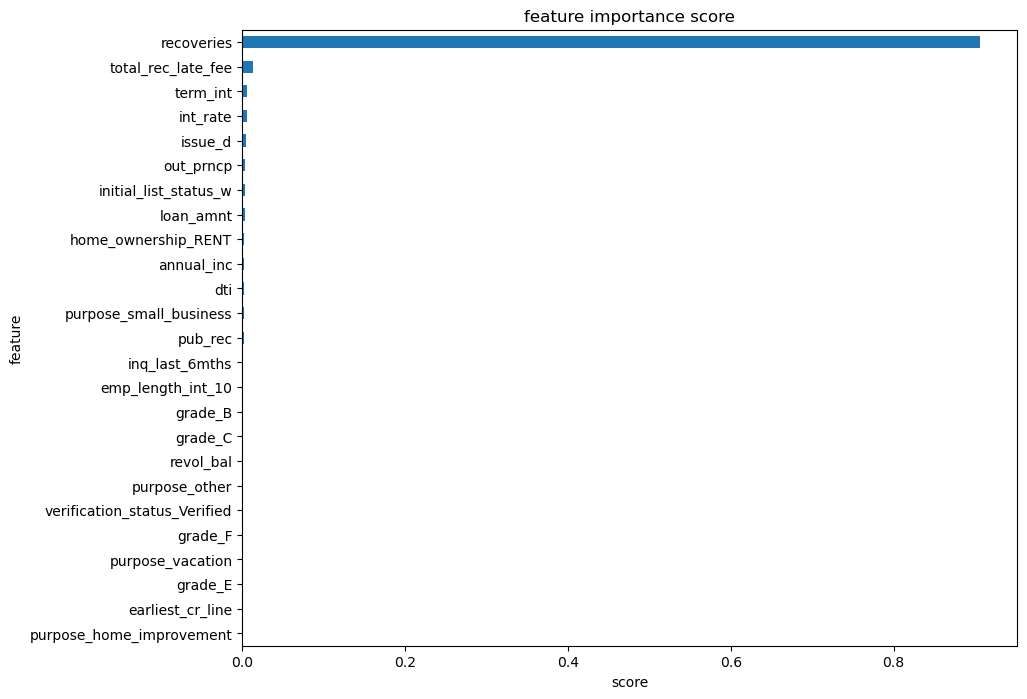

In [88]:
show_feature_importance(xg)

**DecissionTree**

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

eval_clasification(dt)

Accuracy (Tes Set) : 0.90
Precision (Tes Set): 0.53
Recall (Test Set): 0.58
AUC (Test Proba): 0.76
AUC (train-proba) : 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6131225396138035


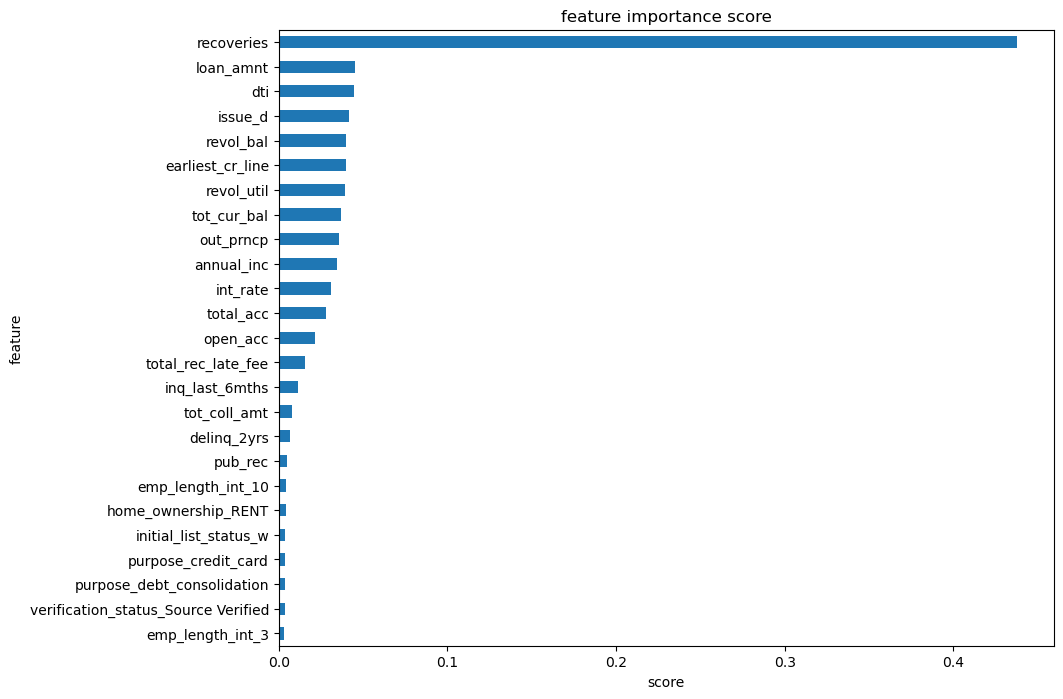

In [90]:
show_feature_importance(dt)

In [91]:
y_pred_proba = abc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

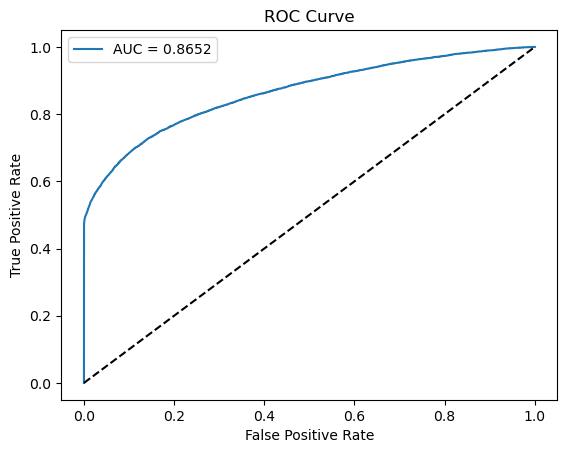

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

**Confussion Matrix**

In [93]:
from sklearn.metrics import confusion_matrix

Ytrue = y_test
Ypred = pd.Series(abc.predict(X_test))

cm_abc = confusion_matrix(Ytrue, Ypred)
cm_abc

array([[82724,   106],
       [ 5354,  5073]])

In [95]:
TP = cm_abc[0][0]
FN = cm_abc[1][0]
FP = cm_abc[0][1]
TN = cm_abc[1][1]

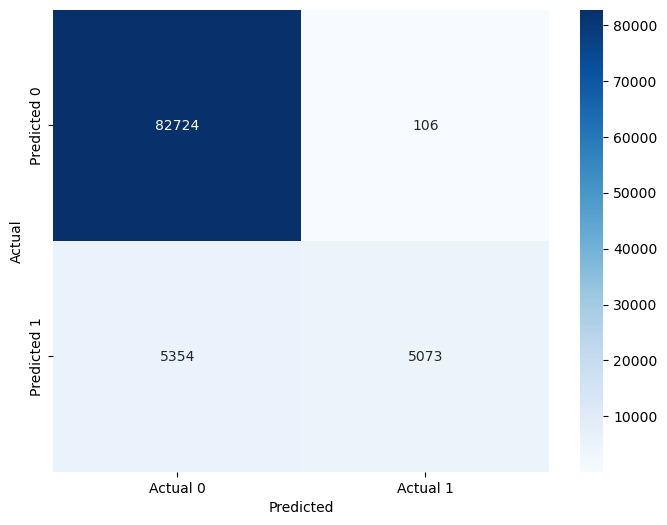

In [96]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung matriks kebingungan
cm = confusion_matrix(y_test, abc.predict(X_test))

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Menggunakan fmt='d' untuk angka tanpa notasi ilmiah
ax.xaxis.set_ticklabels(['Actual 0', 'Actual 1'])
ax.yaxis.set_ticklabels(['Predicted 0', 'Predicted 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()